# Evaluer la qualité d’un modèle

Lino Galiana  
2025-03-19

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/modelisation/1_modelevaluation.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«1_modelevaluation»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«modelisation%201_modelevaluation%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«1_modelevaluation»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«modelisation%201_modelevaluation%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/modelisation/1_modelevaluation.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

Le *machine learning* a l’ambition de proposer des méthodes prédictives simples à mettre en oeuvre sur le plan opérationnel. Cette promesse séduit forcément des acteurs ayant un volume de données conséquent et désirant utiliser celles-ci pour anticiper le comportement de clients ou d’utilisateurs de services. Nous avons vu lors du chapitre précédent la manière de structurer un problème en échantillons d’apprentissage et de validation (<a href="#fig-ml-pipeline" class="quarto-xref">Figure 1</a>) mais sans en expliquer la raison d’être.

<figure id="fig-ml-pipeline">
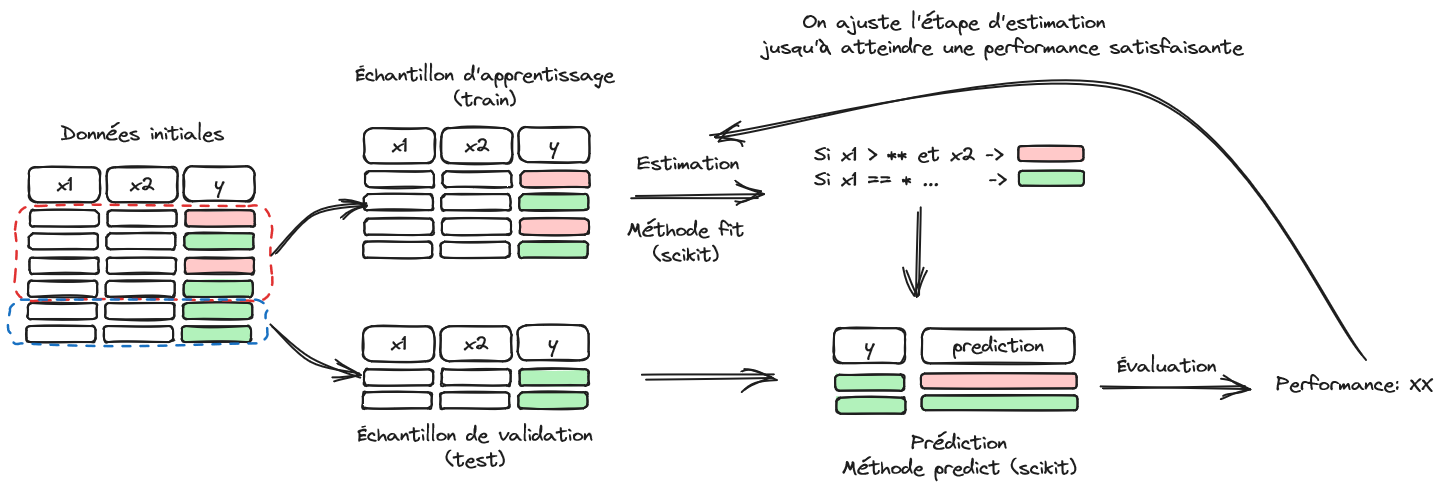
<figcaption>Figure 1: Illustraton de la méthodologie du <em>machine learning</em></figcaption>
</figure>

# 1. Une méthodologie pour éviter le sur-apprentissage

Puisque l’objectif du *machine learning* est de mettre en oeuvre un modèle sur une population cible qui n’est pas celle sur laquelle le modèle a appris - par exemple un modèle de *scoring* ne sert pas à changer les prêts des clients existants mais à prendre une décision pour de nouveaux clients - il est logique de privilégier la validité externe d’un modèle. Pour que les anticipations de performance d’un modèle soient réalistes, il est donc nécessaire d’évaluer les modèles dans un cadre similaire à celui dans lequel il sera mis en oeuvre ultérieurement. Autrement dit, une évaluation honnête d’un modèle se doit d’être une évaluation de la validité externe d’un modèle, c’est-à-dire de la capacité à être bon sur une population qu’il n’a pas rencontré lors de son entraînement.

Pourquoi s’embarasser de cette considération ? Parce que construire un modèle sur un échantillon et l’évaluer sur celui-ci amène à une validité interne forte, au détriment de la validité externe. Autrement dit, si vous avez un contrôle sur les questions de cours, et strictement sur celles-ci, la meilleure stratégie à mettre en oeuvre est d’apprendre par coeur votre cours et le restituer comme tel. Un test de ce type ne cherche pas à savoir si vous comprenez votre cours, seulement si vous avez appris votre cours. Il s’agit de tester la validité interne de vos connaissances. Plus les questions s’éloigneront de ce que vous avez appris par coeur, plus vous serez en difficulté.

L’idée est la même pour un algorithme: plus son apprentissage est adhérant à un échantillon initial, plus ses performances prédictives, et donc sa valeur en pratique, seront limités. C’est pour cette raison qu’on évalue la qualité d’un modèle sur un échantillon qu’il n’a pas vu dans son apprentissage: pour privilégier la validité externe à la validité interne.

On parle de **sur-apprentissage** lorsqu’un modèle a une bonne validité interne mais une mauvaise validité externe, c’est-à-dire de mauvaises qualités prédictives sur un autre échantillon que celui sur lequel il a appris. La structuration d’un problème d’apprentissage sous la forme d’échantillons *train*/*test* est une réponse à ce défi puisqu’elle permet de sélectionner le meilleur modèle en extrapolation. Ce sujet peut apparaître trivial mais, dans les faits, de nombreux champs scientifiques empiriques n’adoptent pas cette méthodologie pour émettre des conclusions au-delà de la population sur laquelle ils ont travaillé.

Par exemple, en économie, il est assez commun d’évaluer une politique publique *toutes choses égales par ailleurs*, d’en déduire un effet marginal et de préconiser des recommandations politiques au-delà de celle-ci. Cependant, il est rare que la politique suivante s’applique à la même population cible ou dans les mêmes conditions institutionnelles, de sorte qu’elle produit généralement des effets différents. Les biais d’échantillonnage, du point de vue des caractéristiques individuelles ou de la période d’étude, sont souvent relégués au second plan et l’estimation des effets marginaux se fait généralement indépendamment de toute notion de validité externe.

Pour en revenir à l’objet de ce chapitre, formellement, ce problème vient de l’**arbitrage biais-variance** dans la qualité d’estimation. Soit $h(X,\theta)$ un modèle statistique. On
peut décomposer l’erreur d’estimation en deux parties :

$$
\mathbb{E}\bigg[(y - h(\theta,X))^2 \bigg] = \underbrace{ \bigg( y - \mathbb{E}(h_\theta(X)) \bigg)^2}_{\text{biais}^2} + \underbrace{\mathbb{V}\big(h(\theta,X)\big)}_{\text{variance}}
$$

Il y a ainsi un compromis à faire entre biais et variance. Un modèle peu parcimonieux, c’est-à-dire proposant un grand nombre de paramètres, va, en général, avoir un faible biais mais une grande variance. En effet, le modèle va tendre à se souvenir d’une combinaison de paramètres à partir d’un grand nombre d’exemples sans être capable d’apprendre la règle qui permette de structurer les données.

Par exemple, la ligne verte ci-dessous est trop dépendante des données et risque de produire une erreur plus importante que la ligne noire (qui moyennise plus) sur de nouvelles données.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/300px-Overfitting.svg.png)

La division entre échantillons d’apprentissage et de validation est une première réponse au défi du surapprentissage. Néanmoins, ce n’est pas le seul geste méthodologique pour avoir un bon modèle prédictif.

De manière générale, il sera préférable d’adopter des modèles parcimonieux, c’est-à-dire les modèles faisant le moins d’hypothèses possibles sur la structure des données tout en offrant une performance satisfaisante. Ceci est généralement vu comme une illustration du principe du [rasoir d’Ockham](https://fr.wikipedia.org/wiki/Rasoir_d'Ockham): en l’absence d’arguments théoriques, le meilleur modèle est celui qui permet d’expliquer au mieux les données avec les hypothèses les plus minimalistes. Cette approche, très opérationnelle, guidera de nombreux choix méthodologiques que nous mettrons en oeuvre.

# 2. Comment évaluer un modèle ?

L’[introduction de cette partie](../../content/modelisation/index.qmd) présentait les principaux concepts pour se repérer dans la terminologie du *machine learning*. Si les concepts d’apprentissage supervisé, non supervisé, classification, régression, etc. ne sont pas clairs, il est recommandé de retourner voir ce chapitre. Pour rappel, le *machine learning* intervient dans les domaines où on ne dispose pas de modèles théoriques, en contrôlant tous les paramètres, faisant consensus et où on va chercher des règles statistiques, selon une démarche inductive. Ce n’est donc pas une approche scientifique justifiée dans tous les domaines. Par exemple, il vaut mieux privilégier le réglage des satelittes par le biais des équations de gravitation que par le biais d’un algorithme de *machine learning* qui risque d’introduire du bruit là où ce n’est pas nécessaire.

La principale ligne de partage entre les méthodes d’évaluation sera la nature du phénomène étudié (la variable $y$). Selon qu’on dispose ou non d’une mesure directe de notre variable d’intérêt, une sorte de *gold standard*, on mettra en oeuvre des métriques prédictives directes (cas de l’apprentissage supervisé) ou des métriques de stabilité statistique (apprentissage non supervisé).

Néanmoins, le succès des [modèles de fondations](https://fr.wikipedia.org/wiki/Mod%C3%A8le_de_fondation), c’est-à-dire de modèles généralistes pouvant être utilisés pour des tâches auxquels ils n’ont pas été entraînés, amène à élargir la question de l’évaluation. Il n’est pas toujours évident de pouvoir définir l’objectif précis d’un modèle généraliste ni de pouvoir évaluer de manière consensuelle sa qualité. `ChatGPT` ou `Claude` nous apparaîssent bon, mais comment peut-on avoir une idée de leur pertinence dans différents cas d’usage ? Outre le sujet des annotations, ceci amène à réfléchir, plus globalement, sur le rôle de l’humain dans l’évaluation et le contrôle de décisions prises par des algorithmes.

## 2.1 Apprentissage supervisé

En apprentissage supervisé, on distingue en général les problèmes de:

-   Classification : la variable $y$ est discrète
-   Régression : la variable $y$ est continue

Les métriques mises en oeuvre peuvent être objectives dans ces deux cas car on dispose d’une valeur réelle, une valeur cible faisant office de *gold standard*, auquel comparer la valeur prédite.

### 2.1.1 Classification

Le cas le plus simple à comprendre est celui de la classification binaire. Dans ce cas, soit on a juste, soit on se trompe, sans nuance.

La plupart des critères de performance consistent ainsi à explorer les différentes cases de la **matrice de confusion** :

<figure>
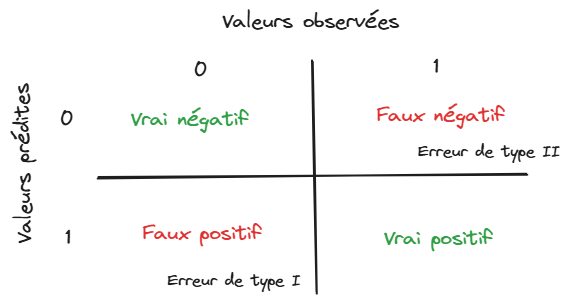
<figcaption aria-hidden="true">Construction de la matrice de confusion</figcaption>
</figure>

Cette dernière met en regard les valeurs prédites avec les valeurs observées. Le cas binaire est le plus simple à appréhender ; la classification multiclasse est une version généralisée de ce principe.

A partir des 4 coins de cette matrice, il existe plusieurs mesures de performance:

| Critère | Mesure | Calcul |
|---------------------|-----------------------|-----------------------------|
| *Accuracy* | Taux de classification correcte | Diagonale du tableau : $\frac{TP+TN}{TP+FP+FN+FP}$ |
| *Precision* | Taux de vrais positifs | Ligne des prédictions positives : $\frac{TP}{TP+FP}$ |
| *Recall* (rappel) | Capacité à identifier les labels positifs | Colonne des prédictions positives : $\frac{TP}{TP+FN}$ |
| *F1 Score* | Mesure synthétique (moyenne harmonique) de la précision et du rappel | $2 \frac{precision \times recall}{precision + recall}$ |

Néanmoins, certaines métriques préfèrent plutôt prendre en compte les probabilités de prédiction. Si un modèle fait une prédiction mais avec une confiance très modérée et qu’on l’accepte, peut-on lui en tenir rigueur ? Pour cela, on fixe un seuil de probabilité $c$ à partir duquel on prédit qu’une observation donnée appartient à une certaine classe prédite:

$$
\mathbb{P}(y_i=1|X_i) > c \Rightarrow \widehat{y}_i = 1 
$$

Plus on augmente $c$, plus on est sélectif sur le critère d’appartenance à la classe.  
La précision, i.e. le taux de vrais positifs parmi les prédictions positives, augmente. Mais on augmente le nombre de positifs manqués (ce sont des faux négatifs). Autrement dit, quand on est pointilleux, on diminue le rappel. Pour chaque valeur de $c$ correspond une matrice de confusion et donc des mesures de performances. La **courbe ROC** consiste à faire varier $c$ de 0 à 1 et vérifier l’effet sur les performances :

![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)

L’aire sous la courbe (**AUC**) permet d’évaluer quantitativement le meilleur modèle au sens de ce critère. L’AUC représente la probabilité que le modèle soit capable de distinguer entre la classe positive et négative.

### 2.1.2 Régression

Lorsqu’on travaille sur une variable quantitative, l’objectif est d’avoir une prédiction la plus proche de celle-ci. Les indicateurs de performance en régression consistent donc à mesurer l’écart entre la valeur prédite et la valeur observée :

| Nom | Formule |
|--------------------------|----------------------------------------------|
| *Mean squared error* | $MSE = \mathbb{E}\left[(y - h_\theta(X))^2\right]$ |
| *Root Mean squared error* | $RMSE = \sqrt{\mathbb{E}\left[(y - h_\theta(X))^2\right]}$ |
| *Mean Absolute Error* | $MAE = \mathbb{E} \bigg[ \lvert y - h_\theta(X) \rvert \bigg]$ |
| *Mean Absolute Percentage Error* | $MAE = \mathbb{E}\left[ \left\lvert \frac{y - h_\theta(X)}{y} \right\rvert \right]$ |

Ces métriques devraient rappeler des souvenirs si vous êtes familiers de la méthode des moindres carrés, ou plus généralement de la régression linéaire. Cette méthode vise justement à trouver des paramètres qui minimisent ces métriques, dans un cadre statistique formel.

## 2.2 Apprentissage non supervisé

Dans cet ensemble de méthodes, on ne dispose pas de *gold standard* pour comparer la prédiction à la valeur observée. Pour mesurer la performance d’un algorithme, il faut donc se résoudre à utiliser des métriques de stabilité des prédictions, basées sur des critères statistiques. Cela permet d’évaluer si le fait de complexifier l’algorithme change fondamentalement la distribution des prédictions.

Les métriques utilisées dépendent du type d’apprentissage mis en oeuvre. Par exemple, le *clustering* par *K-means* utilise généralement une mesure d’inertie qui quantifie l’homogénéité des clusters. Une bonne performance correspond au cas où les clusters sont homogènes et se distinguent l’un de l’autre. Plus on a de clusters (le $K$ de $K-means$), plus ceux-ci tendent à être homogènes. Si on ne choisit pas un $K$ adéquat, on peut faire du sur-apprentissage: si on ne compare les modèles qu’en fonction de leur homogénéité, on va choisir un nombre de cluster très élevé ce qui correspond à un cas classique de surapprentissage. Les méthodes de sélection du nombre de cluster optimal, comme la [méthode du coude](https://en.wikipedia.org/wiki/Elbow_method_(clustering)), visent à évaluer le moment où le gain d’inertie lié à l’augmentation du nombre de clusters tend à s’affaisser. On sélectionne alors le nombre de clusters qui offre le meilleur compromis entre parcimonie et performance.

## 2.3 Comment sont évalués les grands modèles de langage et les IA génératives ?

S’il apparaît relativement intuitif d’évaluer des modèles supervisés (pour lesquels on dispose d’observations faisant office de vérité absolue), comment juger de la qualité d’un outil comme `ChatGPT` ou `Copilot` ? Comment définir une bonne IA générative : est-ce une IA qui fournit une information juste du premier coup (véracité) ? une IA qui fait preuve de capacité de raisonnements (*chain of thought*) dans une discussion ? Doit-on juger le style ou uniquement le fond ?

Ces interrogations sont des champs actifs de recherche. Les [modèles de fondation](https://fr.wikipedia.org/wiki/Mod%C3%A8le_de_fondation) étant très généraux, entraînés à différentes tâches, parfois de manière supervisée, parfois de manière non supervisée, il est difficile de définir un objectif unique permettant de considérer qu’un modèle est, sans ambiguité, meilleur qu’un autre. Le [*leaderboard MTEB (Massive Text Embedding Benchmark)*](https://huggingface.co/blog/lyon-nlp-group/mteb-leaderboard-best-practices) présente par exemple de nombreuses métriques pour des tâches diverses et il peut être difficile de s’y retrouver. Sans compter que le rythme effrené de publication de nouveaux modèles change régulièrement ce classement.

Globalement, même s’il existe des métriques où on fait automatiquement évaluer la qualité d’un texte à un autre LLM (métriques *LLM as a judge*), pour avoir des modèles de langage de qualité, il est nécessaire d’avoir de l’évaluation humaine à plusieurs niveaux. En premier lieu, il est utile d’avoir un corpus de données annotées (des textes avec un résumé rédigé par un humain, des descriptions d’images, etc.) pour la phase d’entraînement et d’évaluation. Ceci permet de guider le comportement du modèle sur une tâche donnée.

Mais l’humain peut aussi intervenir *ex post*, pour faire remonter une évaluation de la qualité d’un modèle. On parle de *feedbacks*. Ceci peut prendre plusieurs formes, par exemple une évaluation positive ou négative de la réponse ou une évaluation plus qualitative. Ces informations remontées ne vont pas forcément servir à la version actuelle du modèle mais pourront servir ultérieurement pour entraîner un modèle selon une technique de renforcement.

## 2.4 Evaluer sans être tourné vers le passé: les enjeux de la supervision des modèles

Il convient de garder en mémoire qu’un modèle de *machine learning* est entraîné sur des données passées. Un usage opérationnel de celui-ci, dans la phase suivante de son cycle de vie, implique donc de faire des hypothèses fortes sur la stabilité des nouvelles données reçues. Si le contexte évolue, un modèle risque de ne plus apporter des performances satisfaisantes. Si dans certains cas cela peut être rapidement mesuré à partir d’indicateurs clés (ventes, nombre de nouveaux clients, etc.) il est tout de même important de conserver un contrôle sur les modèles.

Ceci ouvre à la notion d’**observabilité** d’un modèle de *machine learning*. En informatique, l’observabilité est le principe qui consiste à surveiller, mesurer et comprendre l’état d’une application pour s’assurer que celle-ci soit toujours en mesure de répondre à ses utilisateurs. L’idée de l’observabilité en *machine learning* est similaire : il s’agit de contrôler qu’un modèle permet toujours d’avoir des performances satisfaisantes au cours du temps. Le principal risque dans le cycle de vie d’un modèle est celui du *data drift*, changement dans la distribution des données au fil du temps qui entraîne une dégradation des performances d’un modèle de *machine learning*. Bien sûr, avoir construit un modèle à bonne validité externe va réduire l’effet de ce risque mais il sera inévitable qu’il ait des effets si la structure des données change trop par rapport au contexte d’entraînement.

Pour garder un modèle pertinent dans le temps, il sera nécessaire de régulièrement collecter de nouvelles données (principe des annotations) et adopter une stratégie de ré-entraînement. Ceci ouvre la voie aux problématiques de la mise en production et du MLOps qui sont le point de départ d’un [cours que Romain Avouac et moi donnons](https://ensae-reproductibilite.github.io/website/).